In [1]:
import tensorflow

0.1238060147933331 0.1238060147933331 0.2


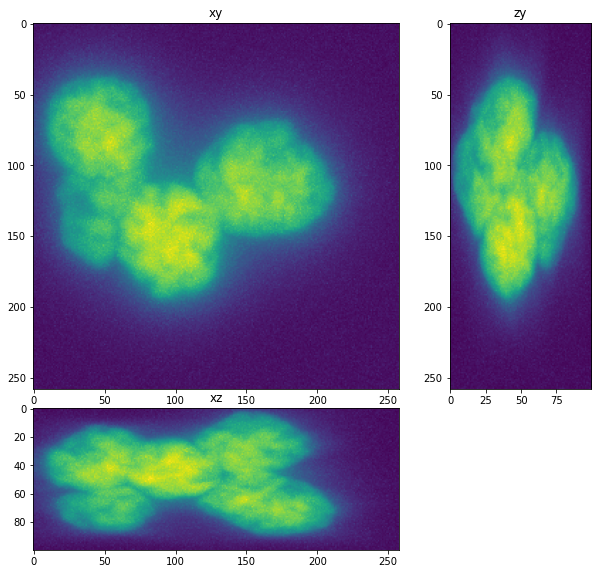

In [2]:
from tnia.io.tifffile_helper import open_ij3D
from tnia.plotting.projections import show_xyz_max

input_dir = "D:\\images\\"

#D:\images             \tnia-python-images\notebooks\segmentaion\nuclei
input_name=input_dir+"\\tnia-python-images\\notebooks\\segmentation\\nuclei\\nuclei4_out_c90_dr10_image.tif"

im_orig, sx, sy, sz = open_ij3D(input_name)
print(sx, sy, sz)
fig=show_xyz_max(im_orig)

In [3]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap
from stardist.models import StarDist3D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [4]:
demo_model = True

if demo_model:
    print (
        "NOTE: This is loading a previously trained demo model!\n"
        "      Please set the variable 'demo_model = False' to load your own trained model.",
        file=sys.stderr, flush=True
    )
    model = StarDist3D.from_pretrained('3D_demo')
else:
    model = StarDist3D(None, name='stardist', basedir='models')
None;

NOTE: This is loading a previously trained demo model!
      Please set the variable 'demo_model = False' to load your own trained model.


Found model '3D_demo' for 'StarDist3D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.707933, nms_thresh=0.3.


In [5]:
from skimage.transform import resize
img=im_orig
img_resized = resize(img, (img.shape[0] // 4, img.shape[1] // 4, img.shape[2]//4), anti_aliasing=True)

In [6]:
axis_norm = (0,1,2)
img = normalize(im_orig, 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

In [7]:
axis_norm = (0,1,2)
img = normalize(img_resized, 1,99.8, axis=axis_norm)
labels2, details = model.predict_instances(img)

In [8]:
labels2 = resize(labels2, [im_orig.shape[0],im_orig.shape[1], im_orig.shape[2]], preserve_range=True, order=0, anti_aliasing=False).astype('int32')

In [10]:
import napari
viewer = napari.Viewer()

# show images
viewer.add_image(im_orig)
viewer.add_labels(labels)
viewer.add_labels(labels2)


__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
event.py (283): coroutine 'get_msg' was never awaited


<Labels layer 'labels2' at 0x261964aa160>

Exception in callback BaseAsyncIOLoop._handle_events(7972, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(7972, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-pac